# aa

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as skp

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

pd.options.display.max_columns = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Ciencia de datos/tp1/listings.csv'
airbnb = pd.read_csv(path)

In [ ]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5269,https://www.airbnb.com/rooms/5269,20250306035046,2025-03-14,city scrape,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,"Waimea, HI","Lea, born and raised on the Island of Hawaii, ...",within an hour,100%,96%,t,https://a0.muscache.com/im/pictures/user/16ac6...,https://a0.muscache.com/im/pictures/user/16ac6...,Island of Hawaiʻi,3.0,6.0,"['email', 'phone']",t,t,Neighborhood highlights,South Kohala,Hawaii,20.02740,-155.70200,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Coffee maker"", ""Garden view"", ""Outdoor furni...",$128.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,8,8,8,8,2025-03-14,40,6,1,0,6,36,4608.0,2011-05-31,2025-02-25,4.78,4.88,4.55,4.95,4.85,5.00,4.85,119-269-5808-01R,f,3,3,0,0,0.24
1,5387,https://www.airbnb.com/rooms/5387,20250306035046,2025-03-15,city scrape,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,"Captain Cook, HI","Kona Hawaii,\n \n Ed is a Farmer/Designer \n\n...",within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/b895b...,https://a0.muscache.com/im/pictures/user/b895b...,Kailua/Kona,2.0,3.0,"['email', 'phone']",t,t,Neighborhood highlights,South Kona,Hawaii,19.43081,-155.88069,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,2.0,"[""Garden view"", ""Cooking basics"", ""Wifi"", ""Ded...",$97.00,5,60,5,5,1125,1125,5.0,1125.0,NaN,t,2,22,48,250,2025-03-15,231,13,0,207,14,130,12610.0,2010-02-16,2025-01-14,4.67,4.69,4.42,4.85,4.88,4.74,4.78,TA-163-133-0304-01,t,2,2,0,0,1.26
2,5480,https://www.airbnb.com/rooms/5480,20250306035046,2025-03-14,city scrape,Isle Of You Naturally Farm Retreat,The Best Choice for your Clothing Optional Nud...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,"Pāhoa, HI","a decade ago, my husband bailed on the mainla...",NaN,NaN,0%,f,https://a0.muscache.com/im/users/8145/profile_...,https://a0.muscache.com/im/users/8145/profile_...,Island of Hawaiʻi,3.0,3.0,"['email', 'phone']",t,f,Neighborhood highlights,Puna,Hawaii,19.44149,-154.91527,Private room in cabin,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Kitchen"", ""Host greets you"", ""Breakfast

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36125 entries, 0 to 36124
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36125 non-null  int64  
 1   listing_url                                   36125 non-null  object 
 2   scrape_id                                     36125 non-null  int64  
 3   last_scraped                                  36125 non-null  object 
 4   source                                        36125 non-null  object 
 5   name                                          36125 non-null  object 
 6   description                                   34983 non-null  object 
 7   neighborhood_overview                         17428 non-null  object 
 8   picture_url                                   36125 non-null  object 
 9   host_id                                       36125 non-null 

In [ ]:
airbnbFilter = airbnb.copy()
airbnbFilter['price'] = airbnbFilter['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
airbnbFilter['host_acceptance_rate'] = airbnbFilter['host_acceptance_rate'].replace('[\%,]','',regex=True).astype(float)

In [ ]:
airbnbFilter['host_response_rate'] = airbnbFilter['host_response_rate'].replace('[\%,]','',regex=True).astype(float)

In [ ]:
airbnbFilter['host_response_time'].unique()

array(['within an hour', nan, 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)

In [ ]:
mapa_host_response_time = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1,
}
airbnbFilter['host_response_time_num'] = airbnbFilter['host_response_time'].map(mapa_host_response_time)

Response time: se transforma: de 4 (lo mas alto) a 1 (lo mas bajo)

In [ ]:
airbnbFilter['host_response_time_num'].isna().sum()

np.int64(2799)

In [ ]:
airbnbFilter = airbnbFilter.drop(columns='host_response_time')
airbnbFilter.reset_index(drop=True,inplace=True)

# Analisis valores NaN

In [ ]:
numeric_df = airbnbFilter.select_dtypes(include=['int64', 'float64'])

analizo cantidad de faltantes o NaN

In [ ]:
missing_percent = (airbnbFilter.isna().sum() / airbnbFilter.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

calendar_updated               100.000000
neighborhood_overview           51.756401
neighbourhood                   51.756401
host_about                      31.955709
host_location                   26.114879
host_neighbourhood              22.380623
review_scores_checkin           22.336332
review_scores_value             22.333564
review_scores_location          22.333564
review_scores_accuracy          22.330796
review_scores_communication     22.330796
review_scores_cleanliness       22.330796
reviews_per_month               22.311419
first_review                    22.311419
review_scores_rating            22.311419
last_review                     22.311419
license                         17.995848
estimated_revenue_l365d         12.680969
price                           12.680969
beds                            12.661592
bathrooms                       12.581315
host_response_time_num           7.748097
host_response_rate               7.748097
host_acceptance_rate             6

Con la informacion sobre los NaN: dropeo calendar_updated (tiene el 100% de NaN)

In [ ]:
airbnbFilter = airbnbFilter.drop(columns='calendar_updated')

In [ ]:
airbnbFilter.reset_index(drop=True,inplace=True)

Analizo otro tipo de Nulos: vacios, carcter especial, valores sin sentido

In [ ]:
caracterRaro = airbnbFilter.astype(str).isin(['-','NULL','?', '']).any()
print(caracterRaro)

id                                              False
listing_url                                     False
scrape_id                                       False
last_scraped                                    False
source                                          False
                                                ...  
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                               False
host_response_time_num                          False
Length: 78, dtype: bool


No se encontraron

**Analizo consistencia de data numerica**

In [ ]:
numeric_df = airbnbFilter.select_dtypes(include=['int64', 'float64'])
(numeric_df < 0).any().to_frame("Menor a 0?")

,Menor a 0?
id,False
scrape_id,False
host_id,False
host_response_rate,False
host_acceptance_rate,False
host_listings_count,False
host_total_listings_count,False
latitude,False
longitude,True
accommodates,False


Nada raro. En 'longitude' son aceptables valores negativos.

In [ ]:
print(numeric_df['bedrooms'].apply(lambda x: x % 1 != 0).sum())

616


In [ ]:
(numeric_df == 0).any().to_frame("Igual a 0?")

,Igual a 0?
id,False
scrape_id,False
host_id,False
host_response_rate,True
host_acceptance_rate,True
host_listings_count,False
host_total_listings_count,False
latitude,False
longitude,False
accommodates,False


In [ ]:
print(numeric_df.dropna().apply(lambda x: x % 1 != 0).any().to_frame())
# Se imprimirá True si encuentra un valor decimal

                                                  0
id                                            False
scrape_id                                     False
host_id                                       False
host_response_rate                            False
host_acceptance_rate                          False
host_listings_count                           False
host_total_listings_count                     False
latitude                                       True
longitude                                      True
accommodates                                  False
bathrooms                                      True
bedrooms                                      False
beds                                          False
price                                         False
minimum_nights                                False
maximum_nights                                False
minimum_minimum_nights                        False
maximum_minimum_nights                        False
minimum_maxi

En principio no tendrían sentido: `reviews_per_month` ni `bathrooms`. El resto son promedios, scores y coordenadas.

In [ ]:
mask_decimal = numeric_df['bathrooms'].dropna().apply(lambda x: x % 1 != 0)
numeric_df.loc[mask_decimal.index[mask_decimal]].head(5)

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time_num
11,227594,20250306035046,1187199,100.0,100.0,2.0,2.0,21.58052,-158.10854,8,1.5,1.0,3.0,125.0,30,760,30,30,1125,1125,30.0,1125.0,30,60,90,365,369,0,0,294,0,0,0.0,4.62,4.52,4.20,4.76,4.79,4.70,4.41,2,0,2,0,2.27,3.0
66,404459,20250306035046,2015818,100.0,96.0,2.0,10.0,20.86686,-156.67308,8,2.5,4.0,5.0,899.0,3,365,3,3,1125,1125,3.0,1125.0,0,19,49,323,92,0,0,250,0,0,0.0,4.79,4.73,4.82,4.93,4.93,4.95,4.59,1,1,0,0,0.72,4.0
75,410705,20250306035046,2044335,100.0,100.0,1.0,1.0,20.91031,-156.32267,3,1.5,1.0,2.0,165.0,3,1125,3,3,1125,1125,3.0,1125.0,12,39,62,301,308,36,5,237,34,216,35640.0,4.79,4.85,4.71,4.89,4.90,4.78,4.78,1,0,1,0,1.96,4.0
89,440924,20250306035046,483893,100.0,100.0,2.0,4.0,21.87428,-159.44711,6,2.5,3.0,5.0,399.0,4,90,4,7,14,90,4.1,87.5,1,19,32,270,172,18,1,229,19,144,57456.0,4.88,4.90,4.90,4.96,4.95,4.89,4.77,2,2,0,0,1.12,4.0
109,485291,20250306035046,4599607,100.0,99.0,3.0,4.0,19.39947,-154.91986,4,1.5,1.0,3.0,134.0,1,21,1,1,1125,1125,1.0,1125.0,16,36,66,235,444,43,3,235,45,255,34170.0,4.81,4.86,4.81,4.90,4.89,4.70,4.76,3,3,0,0,2.94,4.0


In [ ]:
numeric_df['bathrooms'].dropna().apply(lambda x: x % 1 != 0).value_counts()

,count
bathrooms,
False,29178
True,2402


Se estima que es un error de tipeo, no tiene sentido que la cantidad de baños no sea un número entero. Se decide arbitrariamente redondear para abajo, excepto los menores a 1.

In [ ]:
def redondeo(x):
    if pd.isna(x):
        return x
    elif x < 1 and x > 0:
        return 1
    else:
        return np.floor(x)

In [ ]:
numeric_df['bathrooms'] = numeric_df['bathrooms'].apply(redondeo)
airbnbFilter['bathrooms'] = airbnbFilter['bathrooms'].apply(redondeo)

In [ ]:
numeric_df[numeric_df['reviews_per_month'] % 1 != 0].head(5)

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time_num
0,5269,20250306035046,7620,100.0,96.0,3.0,6.0,20.02740,-155.70200,2,1.0,1.0,1.0,128.0,3,1125,3,3,1125,1125,3.0,1125.0,8,8,8,8,40,6,1,0,6,36,4608.0,4.78,4.88,4.55,4.95,4.85,5.00,4.85,3,3,0,0,0.24,4.0
1,5387,20250306035046,7878,100.0,96.0,2.0,3.0,19.43081,-155.88069,2,1.0,0.0,2.0,97.0,5,60,5,5,1125,1125,5.0,1125.0,2,22,48,250,231,13,0,207,14,130,12610.0,4.67,4.69,4.42,4.85,4.88,4.74,4.78,2,2,0,0,1.26,4.0
2,5480,20250306035046,8145,NaN,0.0,3.0,3.0,19.44149,-154.91527,2,1.0,1.0,1.0,117.0,2,60,2,2,60,60,2.0,60.0,30,60,90,365,0,0,0,293,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,3,0,NaN,NaN
3,5532,20250306035046,8279,NaN,NaN,1.0,3.0,21.58225,-158.13614,4,NaN,2.0,NaN,NaN,7,730,7,7,730,730,7.0,730.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN,NaN
4,7888,20250306035046,22083,100.0,NaN,1.0,4.0,19.51225,-154.91020,4,0.0,1.0,1.0,98.0,1,1125,1,1,1125,1125,1.0,1125.0,30,60,90,269,128,0,0,269,0,0,0.0,4.65,4.65,4.70,4.79,4.76,4.25,4.60,1,1,0,0,0.72,2.0


In [ ]:
numeric_df['reviews_per_month'].dropna().apply(lambda x: x % 1 != 0).value_counts()

,count
reviews_per_month,
True,27539
False,526


Por la cantidad de valores no enteros, se estima que `'reviews per month'` es un promedio de reviews por mes.

'price' es el target a predecir. Se decide eliminarlo para no sesgar la posterior estimación.


In [ ]:
airbnb_df = airbnbFilter.copy() # airbnb_df mantiene los price = NaN
airbnbFilter.dropna(subset='price', inplace=True)

Analizar por qué son igual a 0:
*   `estimated_occupancy_l365d` y `estimated_revenue_l365d` (deberian coincidiar)
*   bathrooms
*   bedrooms
*   beds



In [ ]:
numeric_df[numeric_df.availability_30 == 0].shape

(7707, 46)

Se tienen 7707 filas la cual disponibilidad a 30 dias es 0 (no es un valor extraño)

In [ ]:
numeric_df[numeric_df.estimated_revenue_l365d == 0].shape

(10479, 46)

In [ ]:
numeric_df['estimated_revenue_l365d'].isna().sum()

np.int64(4581)

Se tiene 10479 filas con un revenue estimado igual a 0 y 4581 filas NaN con estimated revenue

In [ ]:
numeric_df[numeric_df.estimated_occupancy_l365d == 0].shape

(13551, 46)

In [ ]:
((airbnbFilter['estimated_occupancy_l365d'] == 0) & (airbnbFilter['estimated_revenue_l365d'] == 0)).sum()

np.int64(10479)

In [ ]:
condicion = (airbnbFilter['estimated_occupancy_l365d'] == 0) & (airbnbFilter['estimated_revenue_l365d'].isna())
airbnbFilter.loc[condicion, 'estimated_revenue_l365d'] = 0

In [ ]:
((airbnbFilter['estimated_occupancy_l365d'] == 0) & (airbnbFilter['estimated_revenue_l365d'] == 0)).sum()

np.int64(10479)

In [ ]:
(airbnbFilter['estimated_revenue_l365d']== 0).sum()

np.int64(10479)

In [ ]:
(airbnbFilter['estimated_occupancy_l365d']== 0).sum()

np.int64(10479)

Ahora los NaN presentes en `estimated revenue` son 0 cuando `estimated_occupancy_ `tambien lo es.

In [ ]:
airbnbFilter['estimated_revenue_l365d'].isna().sum()

np.int64(0)

In [ ]:
numeric_df[numeric_df.bedrooms == 0].shape

(3671, 46)

In [ ]:
numeric_df[numeric_df.bathrooms == 0].shape

(219, 46)

In [ ]:
numeric_df[numeric_df.beds == 0].shape

(304, 46)

`['bedrooms','bathrooms','beds']` Más adelante se tratarán en conjunto con valores NaN (decidiré eliminarlos o rellenarlos). En prinicipio no tiene sentio que sean = 0

Sigo analizando las columnas con más precencia de NaN

In [ ]:
airbnbFilter['neighbourhood'].duplicated(keep=False).mean() *100

np.float64(100.0)

In [ ]:
airbnbFilter['neighbourhood'].value_counts()

,count
neighbourhood,
Neighborhood highlights,15524


'`neighbourhood`': se estima que es un booleano (tiene highlights o no tiene)



In [ ]:
airbnbFilter['host_about'].value_counts().sum()

np.int64(21821)

In [ ]:
airbnbFilter['host_about'].isna().sum()

np.int64(9723)

Podria interpretarse como un booleano: se tiene informacion sobre el host o no.

In [ ]:
airbnbFilter['host_is_superhost'].isna().sum()

np.int64(584)

In [ ]:
airbnbFilter['host_is_superhost'].value_counts()

,count
host_is_superhost,
t,16198
f,14762


host_is_superhost se interepreta como Booleano. No se tiene informacion como para recuperar el dato. Se decide eliminarlo, son depreciables las entradas en todo el DataSet.

In [ ]:
airbnbFilter = airbnbFilter.dropna(subset=['host_is_superhost'])

In [ ]:
airbnbFilter['host_is_superhost'] = airbnbFilter['host_is_superhost'].map({'t': True, 'f': False})

<ipython-input-50-24d3c16ba639>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnbFilter['host_is_superhost'] = airbnbFilter['host_is_superhost'].map({'t': True, 'f': False})


In [ ]:
airbnbFilter['host_location'].isna().sum()

np.int64(7956)

Se tranformaría a "no information"

In [ ]:
cols_reviews = ['review_scores_checkin','review_scores_location','review_scores_value', 'review_scores_accuracy', 'review_scores_communication','review_scores_cleanliness', 'review_scores_rating']
airbnbFilter[cols_reviews].isna().sum(axis=1).value_counts()

,count
0,24666
7,6285
6,7
3,1
1,1


* (1) filas no tienen ningún NaN en las columnas de reviews (0 NaN) → están completas

* (2) filas tienen los 7 campos de reviews vacíos (todos NaN) → probablemente nunca fueron alquiladas

* (3) filas tienen 6 NaNs (1 sola columna de reviews tiene dato)

* (4) fila tiene 3 NaNs

* (5) fila tiene solo 1 NaN

Se eliminan esas 9 filas. Se pierde muy poca informacion.

In [ ]:
nan_counts = airbnbFilter[cols_reviews].isna().sum(axis=1)
airbnbFilter = airbnbFilter[(nan_counts == 0) | (nan_counts == 7)]

In [ ]:
cond = (
    airbnbFilter[cols_reviews].isna().sum(axis=1) == len(cols_reviews)
) & (
    airbnbFilter['estimated_revenue_l365d'] == 0
) & ( airbnbFilter['estimated_occupancy_l365d'] == 0)

airbnbFilter[cond].shape[0]

6285

Se observa que las filas que tienen los 7 campos de reviews vacíos, no fueron visitadas en el ultimo año, probablemente nunca. Se Intentará relleanr esas filas.

In [ ]:
missing_percent = (airbnbFilter.isna().sum() / airbnbFilter.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

neighborhood_overview          51.058124
neighbourhood                  51.058124
host_about                     30.435204
host_location                  25.692223
host_neighbourhood             21.805434
review_scores_cleanliness      20.306291
first_review                   20.306291
last_review                    20.306291
reviews_per_month              20.306291
review_scores_value            20.306291
review_scores_rating           20.306291
review_scores_checkin          20.306291
review_scores_communication    20.306291
review_scores_location         20.306291
review_scores_accuracy         20.306291
license                        17.123841
host_response_time_num          5.098381
host_response_rate              5.098381
host_acceptance_rate            4.016025
description                     3.470001
bedrooms                        0.180931
has_availability                0.168007
beds                            0.080773
bathrooms_text                  0.042002
host_since      

In [ ]:
posiblesEliminados = ['has_availability', 'bathrooms_text','host_name','host_since','host_identity_verified','host_verifications','host_total_listings_count','host_listings_count','host_picture_url','host_thumbnail_url','host_has_profile_pic']
airbnbFilter[posiblesEliminados].isna().any(axis=1).sum()

np.int64(71)

Se decide eliminarlos. Número despreciable de filas que se pierden.

In [ ]:
airbnbFilter = airbnbFilter.drop(columns=posiblesEliminados)

In [ ]:
airbnbFilter.reset_index(drop=True,inplace=True)

# rellenar NaN

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

Opcion 1: intentar completar usando info de esa columna (Univariadas):
*   price
*   beds
*   bathrooms
*   bedrooms
*   host_response_time_num
*   host_response_rate



In [ ]:
df_completar_con_valor = airbnbFilter.copy()

In [ ]:
df_completar_con_valor[df_completar_con_valor['bedrooms'] == 0].shape[0]

3544

Posiblemente monoambientes.

In [ ]:
df_completar_con_valor[df_completar_con_valor['beds'] == 0].shape[0]

300

In [ ]:
df_completar_con_valor['beds'] = df_completar_con_valor['beds'].replace(0, np.nan)

In [ ]:
df_completar_con_valor[df_completar_con_valor['bathrooms'] == 0].shape[0]

214

In [ ]:
df_completar_con_valor['bathrooms'] = df_completar_con_valor['bathrooms'].replace(0, np.nan)

In [ ]:
df_completar_con_valor[df_completar_con_valor['price'] == 0].shape[0]

0

Se trata a los 0 como NaN para posterior analisis de todos los NaN. Tiene poco sentido que no haya bathrooms ni beds.

In [ ]:
def show_strategies(df, name_col, k=99):
    _df = df[[name_col]].copy()
    s = df[name_col]

    _df["mediana"] = s.fillna(s.median())
    _df["media"] = s.fillna(s.mean())
    _df["moda"] = s.fillna(s.mode()[0])
    _df["constante"] = k

    return _df[s.isna()]


show_strategies(df_completar_con_valor, "host_response_time_num", 99).head()

,host_response_time_num,mediana,media,moda,constante
2,NaN,4.0,3.804106,4.0,99
15,NaN,4.0,3.804106,4.0,99
26,NaN,4.0,3.804106,4.0,99
29,NaN,4.0,3.804106,4.0,99
34,NaN,4.0,3.804106,4.0,99


Se rellan con 4, valor mas congruente.

In [ ]:
df_completar_con_valor['host_response_time_num'] = df_completar_con_valor['host_response_time_num'].fillna(4)

In [ ]:
def show_strategies(df, name_col, k=99):
    _df = df[[name_col]].copy()
    s = df[name_col]

    _df["mediana"] = s.fillna(s.median())
    _df["media"] = s.fillna(s.mean())
    _df["moda"] = s.fillna(s.mode()[0])
    _df["constante"] = k

    return _df[s.isna()]


show_strategies(df_completar_con_valor, "host_response_rate", 99).head()

,host_response_rate,mediana,media,moda,constante
2,NaN,100.0,98.035645,100.0,99
15,NaN,100.0,98.035645,100.0,99
26,NaN,100.0,98.035645,100.0,99
29,NaN,100.0,98.035645,100.0,99
34,NaN,100.0,98.035645,100.0,99


In [ ]:
df_completar_con_valor[df_completar_con_valor['host_response_rate'] != 100].shape[0]

9054

In [ ]:
df_completar_con_valor['host_response_rate'] = df_completar_con_valor['host_response_rate'].fillna(100)

In [ ]:
def show_strategies(df, name_col, k=99):
    _df = df[[name_col]].copy()
    s = df[name_col]

    _df["mediana"] = s.fillna(s.median())
    _df["media"] = s.fillna(s.mean())
    _df["moda"] = s.fillna(s.mode()[0])
    _df["constante"] = k

    return _df[s.isna()]


show_strategies(df_completar_con_valor, "host_acceptance_rate", 99).head()

,host_acceptance_rate,mediana,media,moda,constante
3,NaN,99.0,89.350276,100.0,99
8,NaN,99.0,89.350276,100.0,99
15,NaN,99.0,89.350276,100.0,99
29,NaN,99.0,89.350276,100.0,99
34,NaN,99.0,89.350276,100.0,99


In [ ]:
df_completar_con_valor['host_acceptance_rate'].isna().sum()

np.int64(1243)

In [ ]:
df_completar_con_valor['host_acceptance_rate'] = df_completar_con_valor['host_acceptance_rate'].fillna(89)

In [ ]:
df_completar_con_valor['host_acceptance_rate'].mean()

np.float64(89.33620884624084)

In [ ]:
df_completar_con_valor['host_acceptance_rate'].median()

99.0

Se mantiene practicamente igual.

In [ ]:
airbnbFilter = df_completar_con_valor.copy()

In [ ]:
airbnbFilter['host_location'] = airbnbFilter['host_location'].fillna('Unknown')

Se decide rellenar con 'unknown'

In [ ]:
missing_percent = (airbnbFilter.isna().sum() / airbnbFilter.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

neighborhood_overview          51.058124
neighbourhood                  51.058124
host_about                     30.435204
host_neighbourhood             21.805434
review_scores_location         20.306291
last_review                    20.306291
first_review                   20.306291
review_scores_rating           20.306291
review_scores_checkin          20.306291
review_scores_cleanliness      20.306291
review_scores_accuracy         20.306291
reviews_per_month              20.306291
review_scores_value            20.306291
review_scores_communication    20.306291
license                        17.123841
description                     3.470001
beds                            1.050047
bathrooms                       0.704339
bedrooms                        0.180931
dtype: float64


Se convierten varias columnas a booleanos para un mejor analisis predictivo. No se considera relevante el contenido, solo si tienen informacion o no.

In [ ]:
airbnbFilter['has_neighborhood_overview'] = airbnbFilter['neighborhood_overview'].notna()

In [ ]:
airbnbFilter['has_neighbourhood_highlights']= airbnbFilter['neighbourhood'].notna()

In [ ]:
airbnbFilter['has_host_about']= airbnbFilter['host_about'].notna()

In [ ]:
airbnbFilter['has_license']= airbnbFilter['license'].notna()

In [ ]:
airbnbFilter['has_description'] = airbnbFilter['description'].notna()

In [ ]:
airbnbFilter = airbnbFilter.drop(columns=['neighborhood_overview','neighbourhood','host_about','license','description',])

In [ ]:
airbnbFilter.reset_index(drop=True,inplace=True)

In [ ]:
airbnbFilter['host_neighbourhood'] = airbnbFilter['host_neighbourhood'].fillna('Unknown')

In [ ]:
missing_percent = (airbnbFilter.isna().sum() / airbnbFilter.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

last_review                    20.306291
first_review                   20.306291
review_scores_cleanliness      20.306291
review_scores_accuracy         20.306291
review_scores_rating           20.306291
review_scores_communication    20.306291
review_scores_location         20.306291
review_scores_value            20.306291
review_scores_checkin          20.306291
reviews_per_month              20.306291
beds                            1.050047
bathrooms                       0.704339
bedrooms                        0.180931
dtype: float64


Se transformarán
*    `first_review` : dias desde la ultima review
*    `last_review` : antiguedad estimada publicacion
*    los NaN en booleano: `has_review`
*    `host_response_time` a numérico

In [ ]:
airbnbFilter[airbnbFilter['last_review'].isna() & airbnbFilter['first_review'].isna()].value_counts().sum()

np.int64(0)

No hay incogruencias entre last_review y first_review.

In [ ]:
airbnbFilter['last_review'] = pd.to_datetime(airbnbFilter['last_review'], errors='coerce')
airbnbFilter['first_review'] = pd.to_datetime(airbnbFilter['first_review'], errors='coerce')

hoy = pd.to_datetime("today")

# since_last_review
airbnbFilter['days_since_last_review'] = (hoy - airbnbFilter['last_review']).dt.days

# review_age_days
airbnbFilter['review_age_days'] = (airbnbFilter['last_review'] - airbnbFilter['first_review']).dt.days

# has_review
airbnbFilter['has_review'] = airbnbFilter['first_review'].notna()

In [ ]:
airbnbFilter = airbnbFilter.drop(columns=['first_review','last_review'])

In [ ]:
airbnbFilter.reset_index(drop=True,inplace=True)

Se usará método univariable para predecir faltantes:
*       beds
*       bathrooms
*       bedrooms

In [ ]:
df_completar_con_valor = airbnbFilter.copy()

In [ ]:
def show_strategies(df, cols, k=99):
    resultados = {}

    for col in cols:
        _df = df[[col]].copy()
        s = df[col]

        _df["mediana"] = s.fillna(s.median())
        _df["media"] = s.fillna(s.mean())
        _df["moda"] = s.fillna(s.mode()[0])
        _df["constante"] = k

        resultados[col] = _df[s.isna()]

    return resultados

In [ ]:
columnas = ['beds', 'bathrooms', 'bedrooms']
estrategias = show_strategies(df_completar_con_valor, columnas)

estrategias['beds'].head()

,beds,mediana,media,moda,constante
113,NaN,2.0,2.587573,2.0,99
183,NaN,2.0,2.587573,2.0,99
457,NaN,2.0,2.587573,2.0,99
600,NaN,2.0,2.587573,2.0,99
665,NaN,2.0,2.587573,2.0,99


In [ ]:
estrategias['bathrooms'].head()

,bathrooms,mediana,media,moda,constante
3,NaN,1.0,1.605994,1.0,99
424,NaN,1.0,1.605994,1.0,99
646,NaN,1.0,1.605994,1.0,99
1041,NaN,1.0,1.605994,1.0,99
1049,NaN,1.0,1.605994,1.0,99


In [ ]:
estrategias['bedrooms'].head()

,bedrooms,mediana,media,moda,constante
1317,NaN,1.0,1.580612,1.0,99
10105,NaN,1.0,1.580612,1.0,99
10752,NaN,1.0,1.580612,1.0,99
11458,NaN,1.0,1.580612,1.0,99
11933,NaN,1.0,1.580612,1.0,99


Valores algo disparejos, se intenta otro método para rellenar.

In [ ]:
airbnbFilter[airbnbFilter['beds'].isna() & airbnbFilter['bedrooms'].isna()].shape[0]

1

Se elimina

In [ ]:
airbnbFilter = airbnbFilter[~(airbnbFilter['beds'].isna() & airbnbFilter['bedrooms'].isna())]

In [ ]:
airbnbFilter['beds'] = airbnbFilter['beds'].fillna(airbnbFilter['bedrooms'])

<ipython-input-100-90a18dbc5513>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnbFilter['beds'] = airbnbFilter['beds'].fillna(airbnbFilter['bedrooms'])


Se coloca una cama por cada dormitorio, es la minima cantidad de camas que deberian tener por dormitorio.

In [ ]:
airbnbFilter[airbnbFilter['bathrooms'].isna() & airbnbFilter['bedrooms'].isna()].shape[0]

0

# Intento con método multivariable.

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [ ]:
columnas = ["bathrooms", "bedrooms"]
df_eliminar_nans_op = airbnbFilter[columnas].copy()

lr = LinearRegression()
imp = IterativeImputer(
    estimator=lr, missing_values=np.nan, max_iter=20, verbose=0, random_state=0
)
df_eliminar_nans_op_completo = imp.fit_transform(df_eliminar_nans_op)

In [ ]:
df_eliminar_nans_op_completo = pd.DataFrame(
    df_eliminar_nans_op_completo,
    columns=columnas,
    index=airbnbFilter[columnas].index
)

In [ ]:
df_eliminar_nans_op_completo[df_eliminar_nans_op_completo['bathrooms'].isna() & df_eliminar_nans_op_completo['bedrooms'].isna()].sum()

,0
bathrooms,0.0
bedrooms,0.0


In [ ]:
airbnbFilter[columnas] = df_eliminar_nans_op_completo

In [ ]:
from sklearn.impute import KNNImputer

df_knn = airbnbFilter.copy().select_dtypes(include=np.number)

knn = KNNImputer(n_neighbors=3, add_indicator=True)

knn.fit(df_knn)
knn.transform(df_knn)

array([[5.26900000e+03, 2.02503060e+13, 7.62000000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.38700000e+03, 2.02503060e+13, 7.87800000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.48000000e+03, 2.02503060e+13, 8.14500000e+03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.36984176e+18, 2.02503060e+13, 1.97961740e+07, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.36986593e+18, 2.02503060e+13, 5.95524064e+08, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.36992219e+18, 2.02503060e+13, 5.29290529e+08, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
df_imputed = pd.DataFrame(
    knn.transform(df_knn),
    columns=knn.get_feature_names_out(),
    index=df_knn.index
)

In [ ]:
missing_percent = (df_imputed.isna().sum() / df_imputed.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

Series([], dtype: float64)


In [ ]:
df_no_numericas = airbnbFilter.select_dtypes(exclude='number')
df_final = pd.concat([df_imputed, df_no_numericas], axis=1)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30950 entries, 0 to 30950
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30950 non-null  float64
 1   scrape_id                                     30950 non-null  float64
 2   host_id                                       30950 non-null  float64
 3   host_response_rate                            30950 non-null  float64
 4   host_acceptance_rate                          30950 non-null  float64
 5   latitude                                      30950 non-null  float64
 6   longitude                                     30950 non-null  float64
 7   accommodates                                  30950 non-null  float64
 8   bathrooms                                     30950 non-null  float64
 9   bedrooms                                      30950 non-null  floa

In [ ]:
missing_percent = (df_final.isna().sum() / df_final.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

Series([], dtype: float64)


Data set limpio de valores nulos.

# Analisis de valores atipicos (univariado)

---



In [ ]:
import seaborn as sns

<Axes: ylabel='price'>

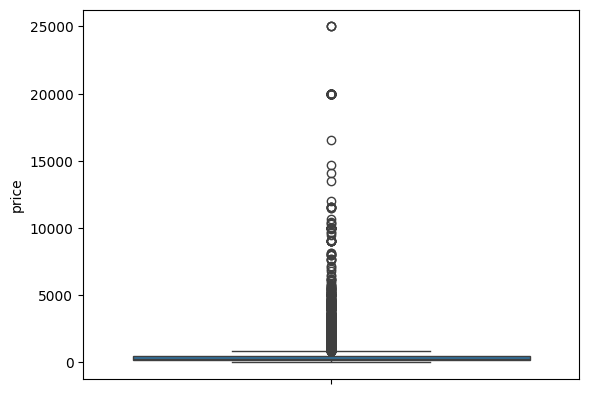

In [ ]:
sns.boxplot(y = df_final.price)

<Axes: ylabel='reviews_per_month'>

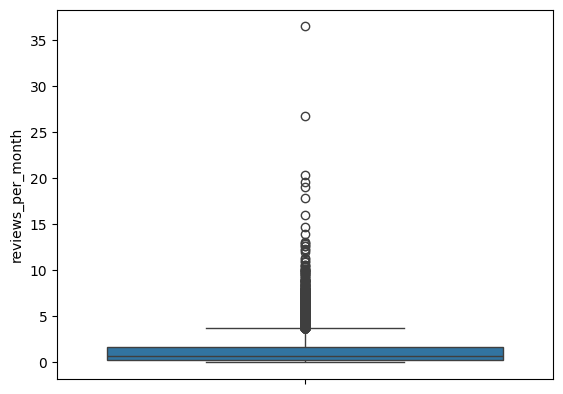

In [ ]:
sns.boxplot(y = df_final.reviews_per_month)

Se debería analizar

<Axes: ylabel='beds'>

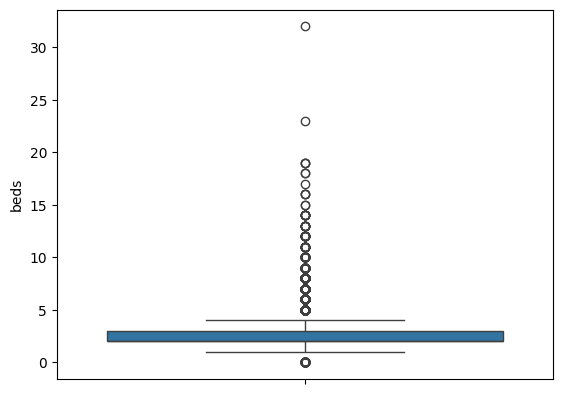

In [ ]:
sns.boxplot(y = df_final.beds)

<Axes: ylabel='bedrooms'>

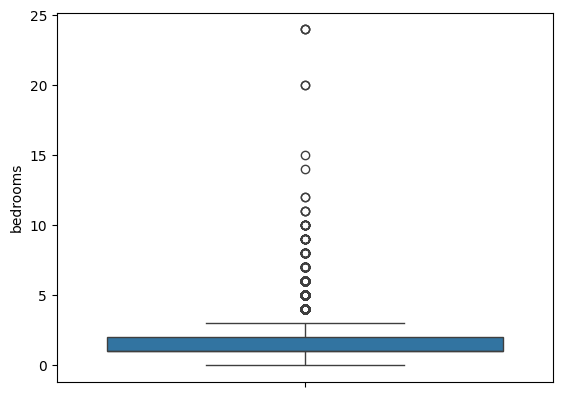

In [ ]:
sns.boxplot(y = df_final.bedrooms)

<Axes: ylabel='bathrooms'>

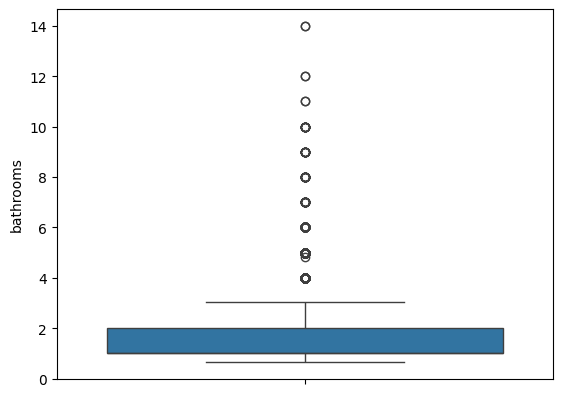

In [ ]:
sns.boxplot(y = df_final.bathrooms)

Se deberíana analizar las 3 en conjunto.

<Axes: ylabel='review_scores_rating'>

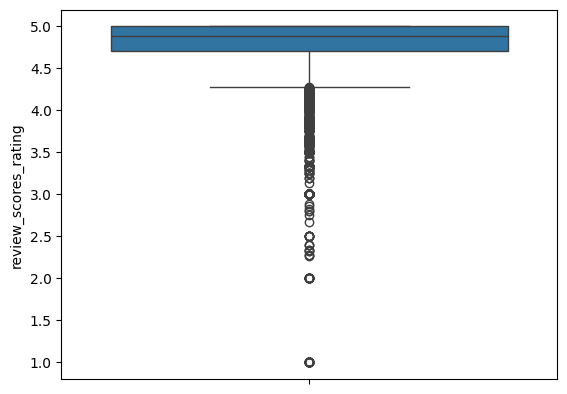

In [ ]:
sns.boxplot(y = df_final.review_scores_rating)

No parece anormal en este gráfico.

z score modificado:

In [ ]:
def z_mod_calculation(serie):
  median = np.median(serie)
  MAD = np.median(np.absolute(serie - median))
  epsilon = 1e-10
  return (serie - median) * 0.6745 / (MAD + epsilon)

In [ ]:
# Z-score modificado camas
df_final["zm_beds"] =  z_mod_calculation(df_final.beds)

# Z-score modificado dormitorios
df_final["zm_bedrooms"] =  z_mod_calculation(df_final.bedrooms)

# Z-score modificado baños
df_final["zm_bathrooms"] =  z_mod_calculation(df_final.bathrooms)

In [ ]:
df_final[['zm_beds','zm_bedrooms','zm_bathrooms']].tail()

,zm_beds,zm_bedrooms,zm_bathrooms
30946,-0.6745,0.0000,0.000000e+00
30947,5.3960,5.3960,5.396000e+10
30948,0.0000,0.0000,0.000000e+00
30949,-0.6745,-0.6745,0.000000e+00
30950,0.0000,0.6745,6.745000e+09


In [ ]:
df_final[df_final["zm_beds"] > 3.5].shape[0]

410

In [ ]:
df_final[df_final["zm_beds"] < -3.5].shape[0]

0

In [ ]:
df_final[df_final["zm_bedrooms"] > 3.5].shape[0]

89

In [ ]:
df_final[df_final["zm_bedrooms"] < -3.5].shape[0]

0

No logro comprender que hago con estos valores ... estudiar Z score

# Analisis valores atipicos (multivariado)

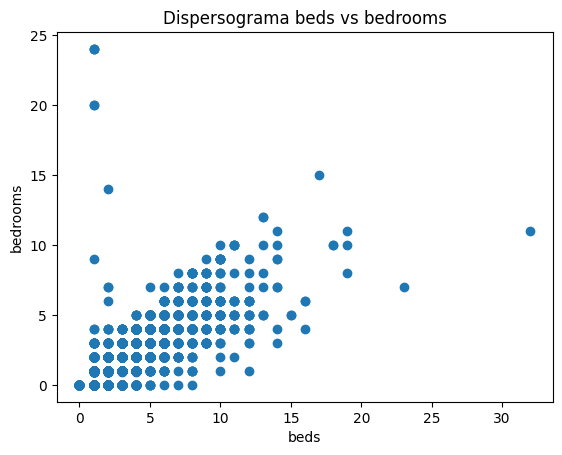

In [ ]:
# Scatter Plot
plt.scatter(df_final.beds, df_final.bedrooms)
plt.title("Dispersograma beds vs bedrooms")
plt.xlabel("beds")
plt.ylabel("bedrooms")
plt.show()

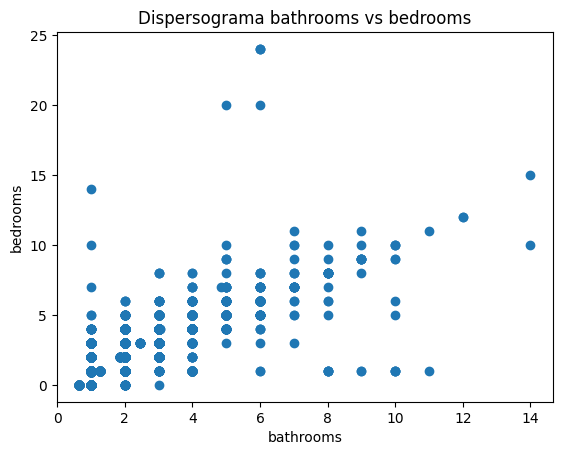

In [ ]:
# Scatter Plot
plt.scatter(df_final.bathrooms, df_final.bedrooms)
plt.title("Dispersograma bathrooms vs bedrooms")
plt.xlabel("bathrooms")
plt.ylabel("bedrooms")
plt.show()

In [ ]:
df_final.select_dtypes(np.number).info()

<class 'pandas.core.frame.DataFrame'>
Index: 30950 entries, 0 to 30950
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30950 non-null  float64
 1   scrape_id                                     30950 non-null  float64
 2   host_id                                       30950 non-null  float64
 3   host_response_rate                            30950 non-null  float64
 4   host_acceptance_rate                          30950 non-null  float64
 5   latitude                                      30950 non-null  float64
 6   longitude                                     30950 non-null  float64
 7   accommodates                                  30950 non-null  float64
 8   bathrooms                                     30950 non-null  float64
 9   bedrooms                                      30950 non-null  floa

In [ ]:
columnas_relevantes = []

# Graficos de analisis y otros

In [ ]:
airbnb.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.612500e+04,3.612500e+04,3.612500e+04,36119.000000,36119.000000,36125.000000,36125.000000,36125.000000,31580.000000,35509.000000,31551.000000,36125.000000,36125.000000,36125.000000,36125.000000,3.612500e+04,3.612500e+04,36125.000000,3.612500e+04,0.0,36125.000000,36125.000000,36125.000000,36125.000000,36125.000000,36125.000000,36125.000000,36125.000000,36125.000000,36125.000000,31544.000000,28065.000000,28058.000000,28058.000000,28056.000000,28058.000000,28057.000000,28057.000000,36125.000000,36125.000000,36125.000000,36125.000000,28065.000000
mean,5.309623e+17,2.025031e+13,1.906042e+08,195.613721,299.410255,20.916439,-157.226731,4.773813,1.629639,1.605480,2.563215,9.223862,544.142256,8.843765,12.246727,1.189373e+06,1.724568e+06,9.643081,1.330704e+06,NaN,10.513716,24.768637,41.162519,192.891820,37.596180,8.048969,0.637121,157.771322,8.000720,54.967502,16835.612097,4.785286,4.800611,4.769334,4.849253,4.837068,4.869450,4.681503,82.624858,77.614062,2.964734,0.006533,1.106640
std,5.083067e+17,1.412910e+01,1.829314e+08,465.679428,878.843135,0.813824,1.291527,2.408696,0.907267,1.133161,1.537484,30.602266,454.411309,29.374768,36.826427,5.051573e+07,6.082140e+07,29.690649,5.204709e+07,NaN,10.091488,20.103989,30.002664,123.413023,72.847828,13.726129,1.293344,99.758891,13.938269,76.940465,29340.287170,0.343345,0.354140,0.347449,0.312496,0.334057,0.240073,0.389460,123.551705,121.836386,10.165973,0.162207,1.302195
min,5.269000e+03,2.025031e+13,9.080000e+02,1.000000,1.000000,18.920250,-159.716528,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.909606e+07,2.025031e+13,3.783914e+07,3.000000,4.000000,20.690397,-157.839910,4.000000,1.000000,1.000000,2.000000,1.000000,90.000000,1.000000,2.000000,2.700000e+01,1.800000e+02,2.000000,1.200000e+02,NaN,2.000000,7.000000,14.000000,78.000000,1.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000,4.720000,4.760000,4.690000,4.830000,4.810000,4.830000,4.590000,2.000000,1.000000,0.000000,0.000000,0.210000
50%,6.449960e+17,2.025031e+13,1.134417e+08,30.000000,38.000000,20.961670,-156.691325,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,2.000000,4.000000,3.650000e+02,3.650000e+02,3.000000,3.650000e+02,NaN,7.000000,21.000000,40.000000,217.000000,8.000000,2.000000,0.000000,178.000000,2.000000,12.000000,5910.000000,4.890000,4.910000,4.870000,4.940000,4.950000,4.930000,4.770000,21.000000,14.000000,0.000000,0.000000,0.620000
75%,9.929016e+17,2.025031e+13,3.631940e+08,222.000000,284.000000,21.320810,-156.434660,6.000000,2.000000,2.000000,3.000000,4.000000,1125.000000,4.000000,7.000000,1.125000e+03,1.125000e+03,5.000000,1.125000e+03,NaN,17.000000,41.000000,67.000000,300.000000,42.000000,10.000000,1.000000,244.000000,10.000000,84.000000,22914.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.910000,119.000000,106.000000,0.000000,0.000000,1.610

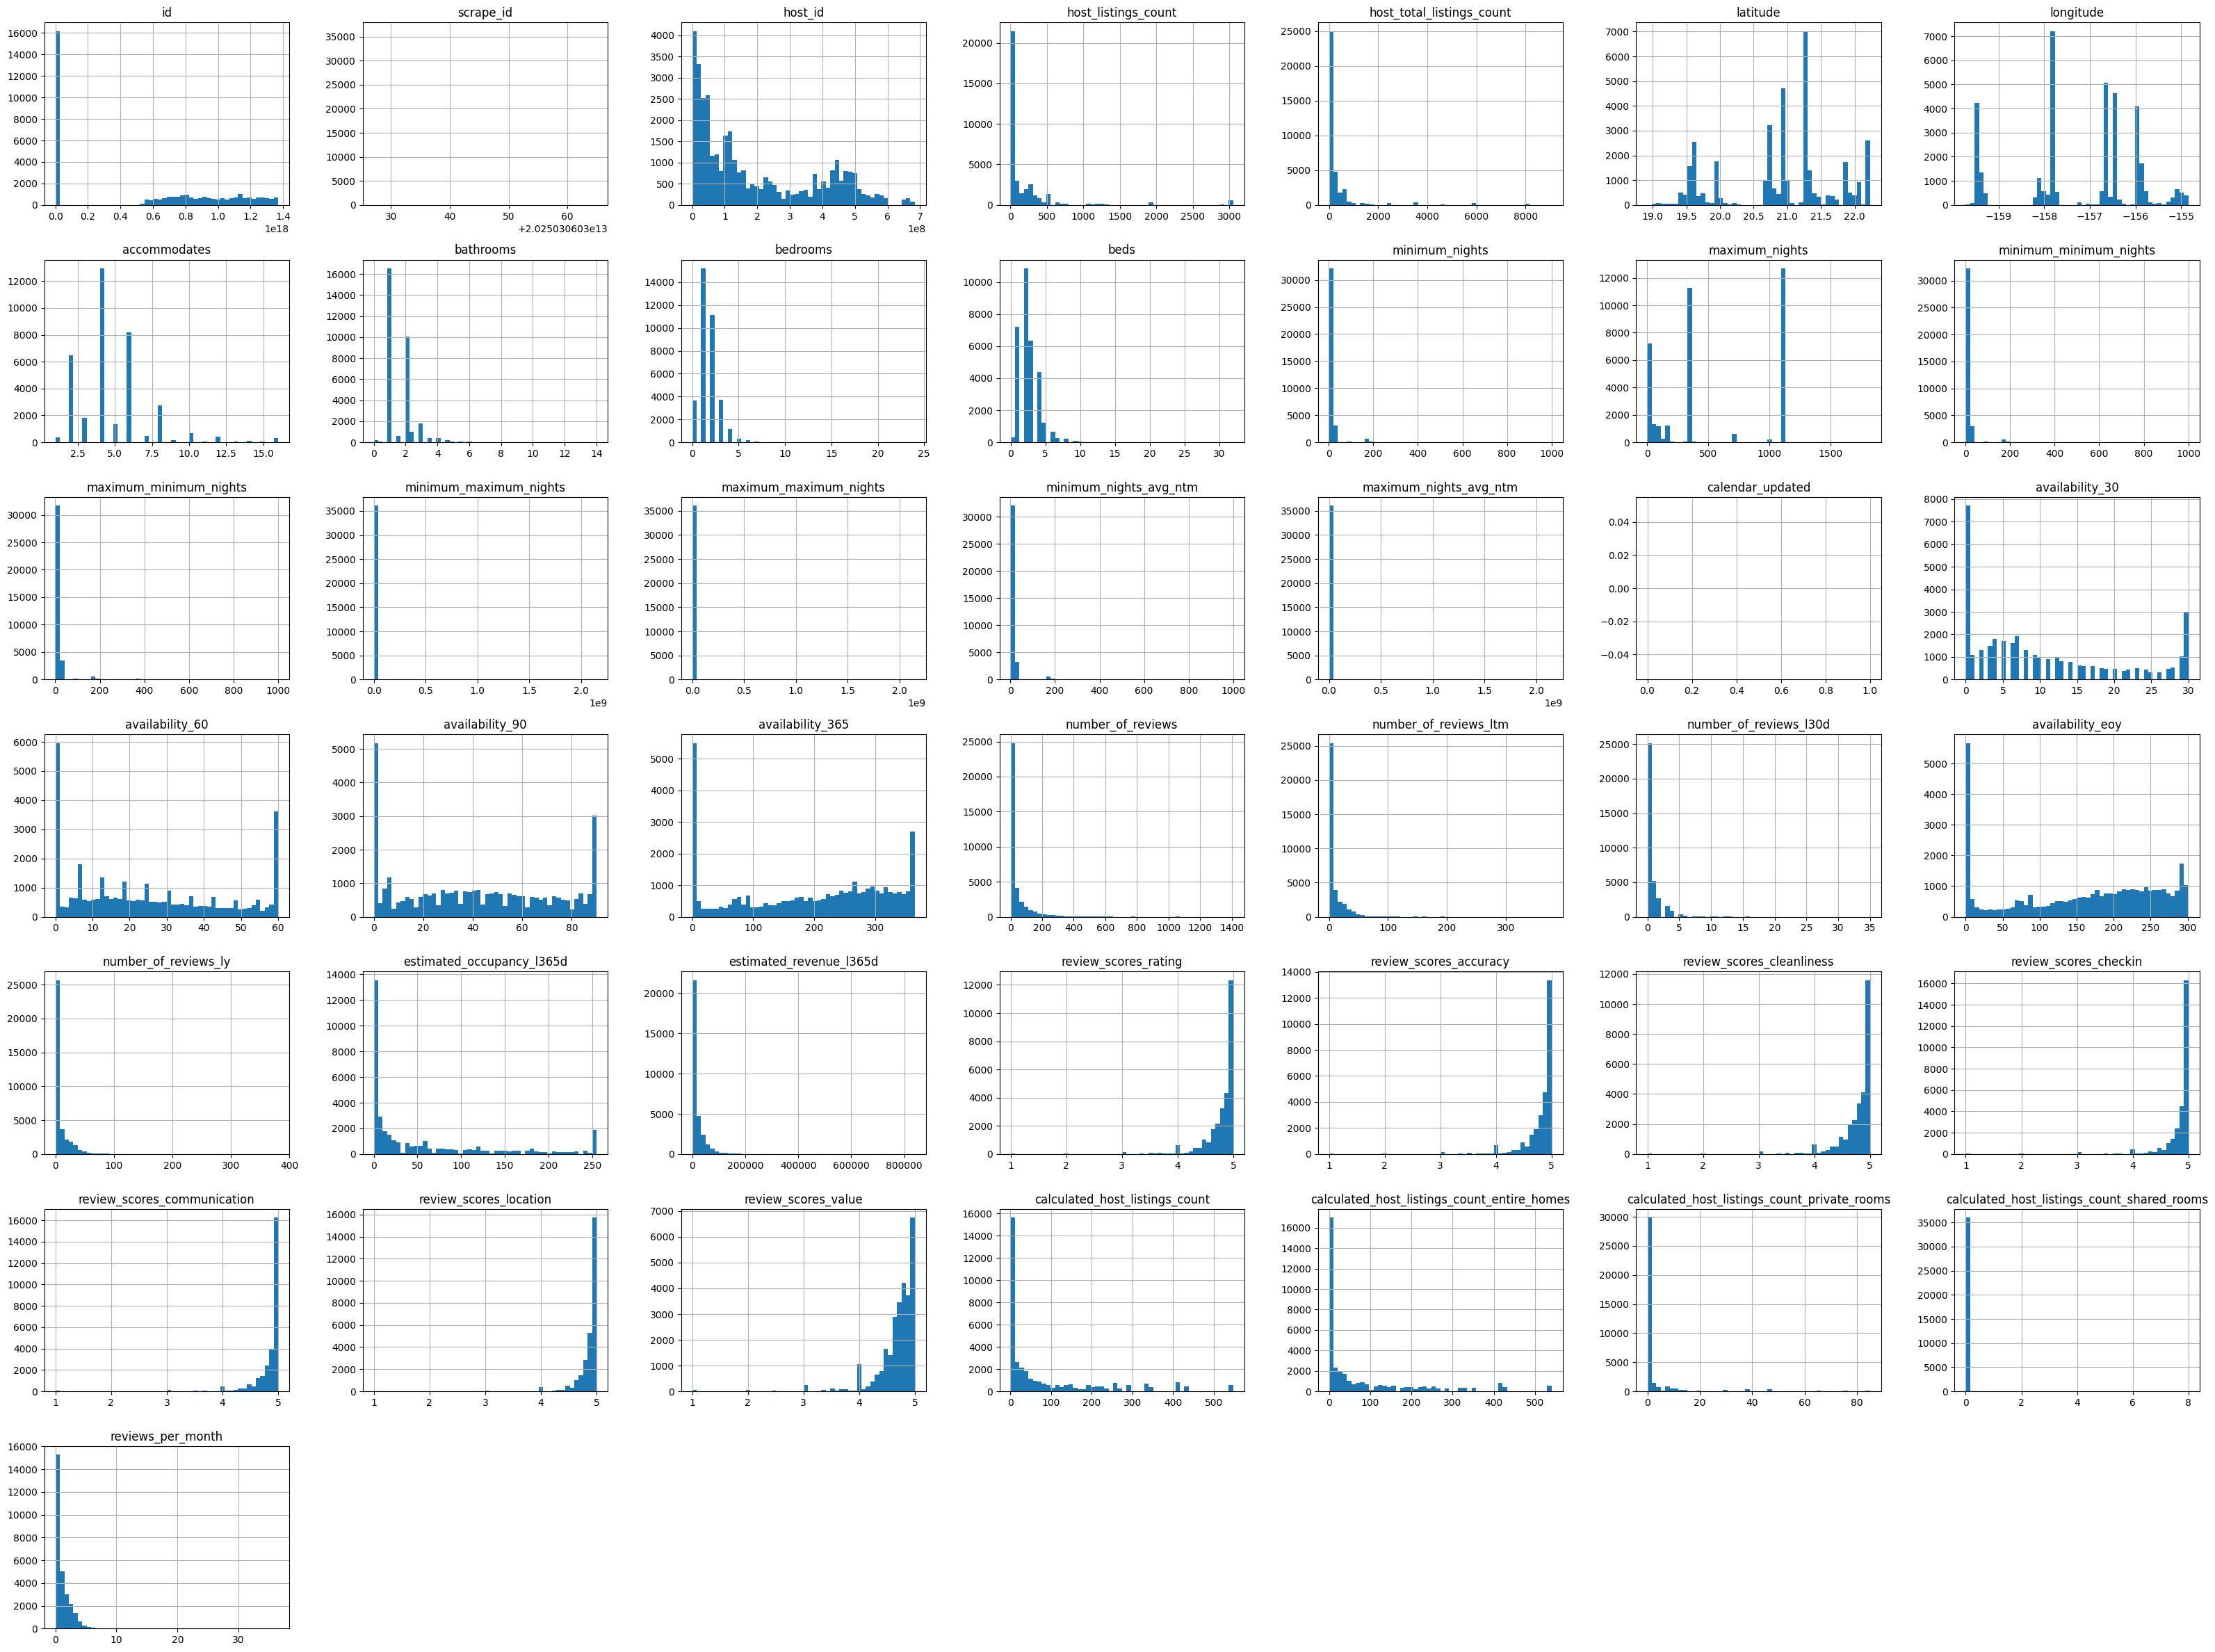

In [ ]:
airbnb.hist(bins=50,figsize=(40,30))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

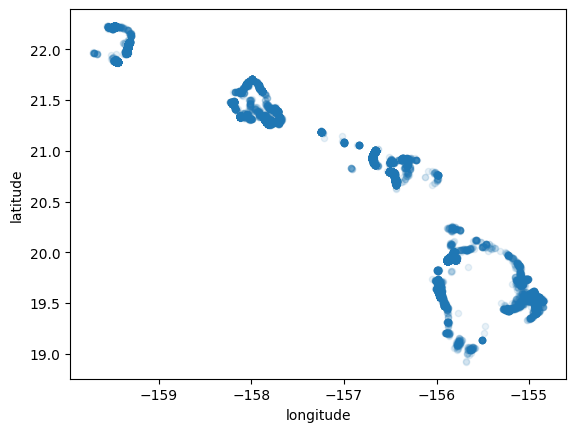

In [ ]:
airbnb.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

se ve como hawaii

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0          $128.00
1           $97.00
2          $117.00
3              NaN
4           $98.00
           ...    
36120      $603.00
36121    $2,610.00
36122       $80.00
36123      $102.00
36124    $1,746.00
Name: price, Length: 36125, dtype: object

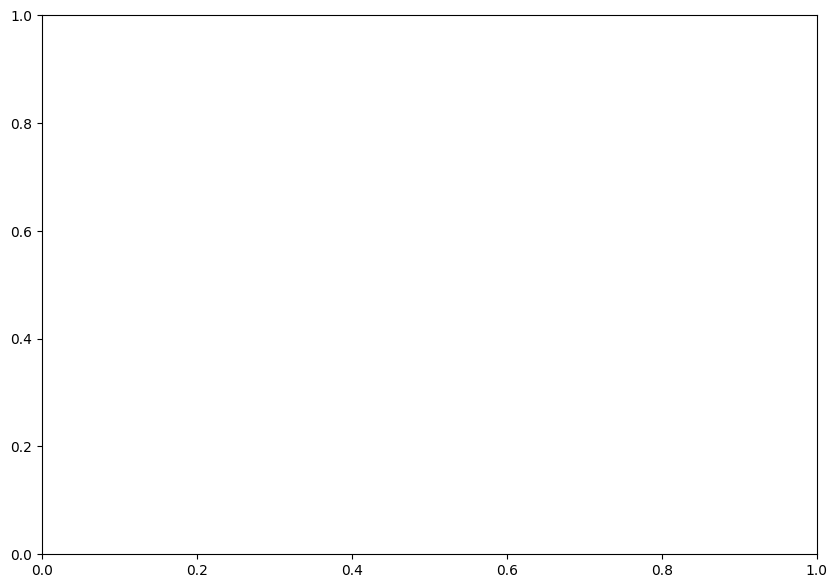

In [ ]:
airbnb.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,figsize=(10,7),s=airbnb['review_scores_rating'],label='score',c=airbnb['price'],cmap=plt.get_cmap('jet'),colorbar=True)

no me dice mucho ...

In [ ]:
#corr_matrix = numeric_df.corr()
#corr_matrix['review_scores_rating'].sort_values(ascending=False)

In [ ]:
#from pandas.plotting import scatter_matrix
#atributes = ['price','accommodates','bedrooms','number_of_reviews','number_of_reviews_l30d','reviews_per_month','review_scores_rating','review_scores_value']
#scatter_matrix(airbnb[atributes],figsize=(50,30))

interpretacion ??? ...